In [7]:
import tensorflow as tf
import keras
from matplotlib import pyplot as plt

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 8

In [10]:
train_dir = './converted_dataset/train'
test_dir = './converted_dataset/test'

In [11]:
train_dataset = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    subset = 'training',
    seed=2024

)

valid_dataset = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    subset = 'validation',
    seed=2024
)


Found 136912 files belonging to 4 classes.
Using 109530 files for training.


2024-04-12 23:57:50.065804: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10257 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1


Found 136912 files belonging to 4 classes.
Using 27382 files for validation.


In [12]:
class_names = train_dataset.class_names
print(class_names)

['fall', 'help', 'indoor', 'medical']


In [13]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
IMG_SHAPE = IMAGE_SIZE + (3,)
inputs = keras.layers.Input(shape=IMG_SHAPE)
model = keras.applications.EfficientNetB0(
    input_tensor=inputs,
    include_top=False,
    weights='imagenet'
)

In [15]:
model.trainable = False

In [16]:
x = keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)

outputs = keras.layers.Dense(4, activation="softmax", name="pred")(x)

In [17]:
model = keras.Model(inputs=inputs, outputs=outputs, name="EfficientNet")
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer = optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [18]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

Epoch 1/10


2024-04-12 23:58:17.344849: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEfficientNet/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-12 23:58:20.533174: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-12 23:58:21.660889: I external/local_xla/xla/service/service.cc:168] XLA service 0x74778c3f0780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-12 23:58:21.660952: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-04-12 23:58:21.679369: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712933901.824285    6794 device_compiler.h:186] Compiled cluste

13692/13692 [==============================] - 2995s 218ms/step - loss: 0.0611 - accuracy: 0.9848 - val_loss: 0.0539 - val_accuracy: 0.9886
Epoch 2/10
13692/13692 [==============================] - 392s 29ms/step - loss: 0.0408 - accuracy: 0.9922 - val_loss: 0.0165 - val_accuracy: 0.9971
Epoch 3/10
13692/13692 [==============================] - 386s 28ms/step - loss: 0.0362 - accuracy: 0.9942 - val_loss: 0.0091 - val_accuracy: 0.9988
Epoch 4/10
13692/13692 [==============================] - 382s 28ms/step - loss: 0.0333 - accuracy: 0.9952 - val_loss: 0.0179 - val_accuracy: 0.9970
Epoch 5/10
13692/13692 [==============================] - 383s 28ms/step - loss: 0.0322 - accuracy: 0.9956 - val_loss: 0.0073 - val_accuracy: 0.9991
Epoch 6/10
13692/13692 [==============================] - 384s 28ms/step - loss: 0.0324 - accuracy: 0.9959 - val_loss: 0.0134 - val_accuracy: 0.9982
Epoch 7/10
13692/13692 [==============================] - 385s 28ms/step - loss: 0.0283 - accuracy: 0.9966 - val_lo

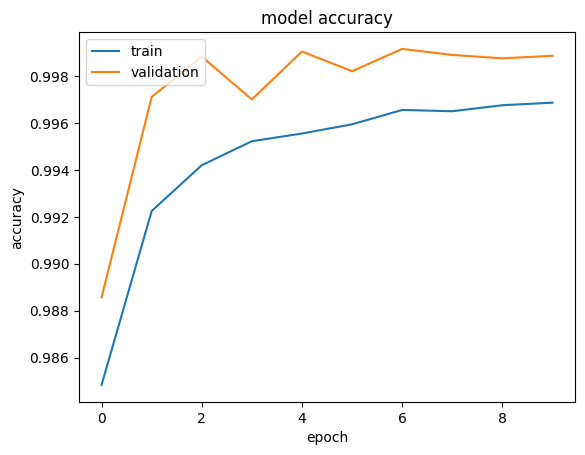

In [19]:
epochs = 10
hist = model.fit(train_dataset, epochs = epochs, validation_data = valid_dataset)
plot_hist(hist)

In [24]:
test_dataset = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    seed=2024
)


Found 14564 files belonging to 4 classes.


In [25]:
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
model.evaluate(test_dataset)

1821/1821 [==============================] - 245s 134ms/step - loss: 0.2070 - accuracy: 0.9923


[0.20704570412635803, 0.9923098087310791]

In [27]:
model.save('first_model.h5')

/media/cis/새 볼륨/audio/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
